In [1]:
from matplotlib import pyplot as plt
from importlib import reload
from utils import *

C:\Users\Alekseyl\Envs\absa\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from jupyterthemes import jtplot
# jtplot.style()  # development
jtplot.reset()  # production

In [3]:
w2v = load_w2v()

Loading real w2v...
Done


In [4]:
import acd
reload(acd)
acd_ = acd.ACD(w2v)

Loading tokenizer...


In [5]:
# ds = load_dataset('data/laptops_train.xml')
ds = load_dataset(r'data/restaurants_train.xml')
fdist = category_fdist(ds)
x_train, y_train = get_acd_ds(ds, fdist, acd_.get_acd_features)

In [6]:
x_train_hand = pickle.load(
    open(r'data/hand/acd/acd-rest-train.pickle', 'rb'), encoding='latin1')
y_train_hand = y_train
x_train_hand.shape

(1708, 660)

In [7]:
# acd_.grid_search_acd(x_train_hand, y_train)

In [8]:
# acd_.grid_search_acd(x_train, y_train)

Running MLP (156)...
    max_iter   Mean F1
0       50.0  0.727194
1      150.0  0.801239
2      250.0  0.820235
3      350.0  0.821327
4      450.0  0.818165
5      550.0  0.815000
6      650.0  0.811883
7      750.0  0.809172
8      850.0  0.809909
9      950.0  0.810563
10    1050.0  0.810563
11    1150.0  0.810563
Grid search results:
  Классификатор Оптимизируемый параметр Значение параметра     Max Mean F1
0     MLP (156)                max_iter                350  0.821327279549


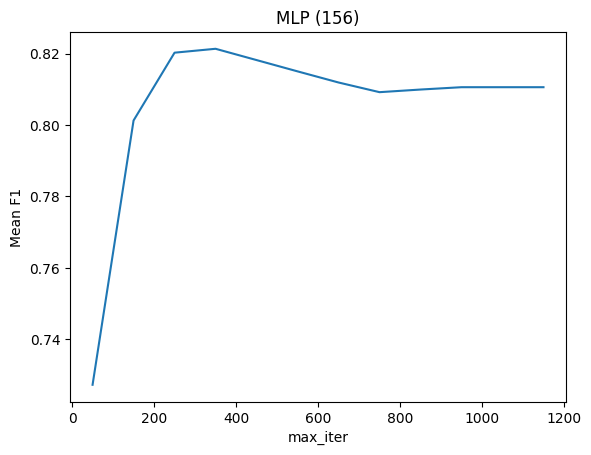

In [9]:
import numpy as np
merged_train = np.concatenate([x_train, x_train_hand], axis=1)

acd_.grid_search_acd(merged_train, y_train)